# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read data

In [2]:
df_train = pd.read_csv('clean data/train.csv')
df_val = pd.read_csv('clean data/val.csv')
df_test = pd.read_csv('clean data/test.csv')

In [3]:
X_train = df_train.drop(columns='price', axis=0).to_numpy()
y_train = df_train['price'].to_numpy()

X_val = df_val.drop(columns='price', axis=0).to_numpy()
y_val = df_val['price'].to_numpy()

X_test = df_test.drop(columns='price', axis=0).to_numpy()
y_test = df_test['price'].to_numpy()

In [4]:
input_dim = X_train.shape[1]
output_dim = 1

# Training

In [5]:
model_checkpoint = ModelCheckpoint(
    filepath = "Model/mlp.h5",
    save_best_only=True)

early_stopping = EarlyStopping(
    patience=5,
    restore_best_weights=True)

reduce_lr_on_plateau = ReduceLROnPlateau(
    verbose = 1,
    factor=0.1,
    patience=2) 

In [6]:
model = Sequential()
model.add(Dense(units=input_dim, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=output_dim))

In [7]:
# compile network
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse'])
# fit network
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr_on_plateau])

Epoch 1/200
368/368 [==============================] - 3s 4ms/step - loss: 23.9006 - mse: 23.9006 - val_loss: 14.9824 - val_mse: 14.9824
Epoch 2/200
368/368 [==============================] - 1s 2ms/step - loss: 11.8198 - mse: 11.8198 - val_loss: 10.9305 - val_mse: 10.9305
Epoch 3/200
368/368 [==============================] - 1s 2ms/step - loss: 10.1251 - mse: 10.1251 - val_loss: 10.4396 - val_mse: 10.4396
Epoch 4/200
368/368 [==============================] - 1s 2ms/step - loss: 9.9690 - mse: 9.9690 - val_loss: 10.3988 - val_mse: 10.3988
Epoch 5/200
368/368 [==============================] - 1s 3ms/step - loss: 9.9549 - mse: 9.9549 - val_loss: 10.3778 - val_mse: 10.3778
Epoch 6/200
368/368 [==============================] - 1s 2ms/step - loss: 9.8536 - mse: 9.8536 - val_loss: 10.0419 - val_mse: 10.0419
Epoch 7/200
368/368 [==============================] - 1s 2ms/step - loss: 9.0632 - mse: 9.0632 - val_loss: 8.6475 - val_mse: 8.6475
Epoch 8/200
368/368 [==============================

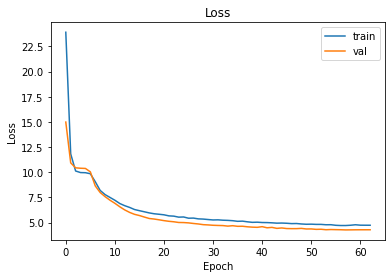

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Result

In [9]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, y_pred.shape[0])

In [10]:
# y_pred = np.power(np.e, y_pred) - 1
# y_test = np.power(np.e, y_test) - 1

In [11]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)
print('R2:', r2)

MAE: 1.493900932121082
RMSE: 2.0697278731499726
MAPE: 0.3071668737449017
R2: 0.5837065436578988


In [12]:
def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('MLP')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

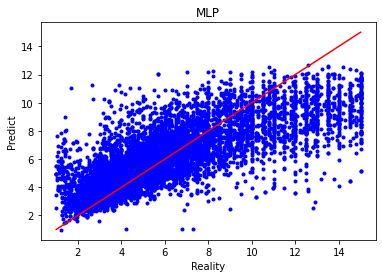

In [13]:
plot_evaluate(y_test, y_pred)